# New Ingredient Image Analysis

## Questions

### Ingredient Images

- 1,017,429 products (27.7%) have ingredient image, of which
  - 961,041 products (94.5%) have state tag `en:ingredients-photo-selected` -> 56,398 (5.5%) missing. 🤔
  - 895,262 products (88.0%) have one ingredient image.
  - 108,168 products (10.6%) have two ingredient images.
  -  14,009 products ( 1.4%) have three or more ingredient images.

- 1,163,301 ingredient images, of which in languages
  - 579,762 (57.0%) fr 🇫🇷
  - 212,462 (20.9%) en 🇬🇧🇺🇸
  - 107,551 (10.6%) de 🇩🇪
  -  78,250 ( 7.7%) es 🇪🇸
  -  46,234 ( 4.5%) unknown ❓🤔
  - 139,042 (13.7%) in 111 other languages 🌎

### Recognized Ingredients

- 

### To be done:
- age of ingredient images
    - what is the age of ingredient images per language
- OCR
    - how many photos have extracted text?
    - are extractions missing for some languages?
- Recognition
    - How many ingredients can be recognized?
    - What are the most unrecognized ingredients per image?
        - What is the main reason for these errors? (OCR, spelling, missing taxonomy?)
- Percentage Analysis
    - How many have analyzed percentages?
    - What is the main reason for failed percentage analysis?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
%%time
file_path = "../data/ingredients_data_export_jq.csv"
df = pd.read_csv(file_path, dtype={'code':str})
df = df[df.code.notna()] # exclude empty barcodes

# use Int64 to counts with NaN
for col in ['ingredients_n', 'known_ingredients_n', 'unknown_ingredients_n', 'ingredients_percent_analysis']:
    df[col] = df[col].astype('Int64')

display(df)

,code,ingredients_n,known_ingredients_n,unknown_ingredients_n,has_analysis_tags,ingredients_percent_analysis,images,states,quality_info
0,0000101209159,<NA>,<NA>,<NA>,False,<NA>,ingredients_fr,"en:ingredients-to-be-completed,en:ingredients-...",NaN
1,0000105000011,1,3,0,True,1,NaN,en:ingredients-completed,en:ingredients-percent-analysis-ok
2,0000105000042,1,3,0,True,1,NaN,en:ingredients-completed,en:ingredients-percent-analysis-ok
3,0000105000059,1,0,1,True,1,NaN,en:ingredients-completed,en:ingredients-percent-analysis-ok
4,0000105000073,1,2,0,True,1,NaN,en:ingredients-completed,en:ingredients-percent-analysis-ok
...,...,...,...,...,...,...,...,...,...
3671223,8854545889857,<NA>,<NA>,<NA>,False,<NA>,NaN,"en:ingredients-to-be-completed,en:ingredients-...",NaN
3671224,8854545889840,<NA>,<NA>,<NA>,False,<NA>,NaN,"en:ingredients-to-be-completed,en:ingredients-...",NaN
3671225,8854545889925,<NA>,<NA>,<NA>,False,<NA>,NaN,"en:ingredients-to-be-completed,en:ingredients-...",NaN
3671226,8854545889871,<NA>,<NA>,<NA>,False,<NA>,NaN,"en:ingredients-to-be-completed,en:ingredients-...",NaN


CPU times: user 3.13 s, sys: 425 ms, total: 3.56 s
Wall time: 3.66 s


## Analyze Ingredient Images

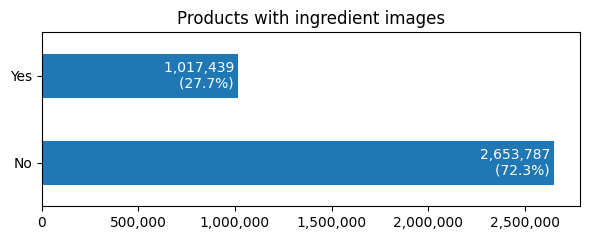

In [3]:
ax = df.images.notna().value_counts().plot.barh(title='Products with ingredient images', figsize=(6,2.5))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax.set_ylabel(None)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            f'{width:,} \n({width / len(df) * 100:.1f}%) ', va='center', ha='right', color='white')

ax.set_yticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

In [4]:
df_images = df[df.images.notna()]

## Marked as Selected

In [5]:
print("selected total:", df.states.str.contains('en:ingredients-photo-selected').sum())
print("selected image:", df_images.states.str.contains('en:ingredients-photo-selected').sum())
print("selected percent:", "{:.1f}%".format(df.states.str.contains('en:ingredients-photo-selected').sum() / len(df_images) * 100))
print("selected diff:", "{:,}".format(len(df_images) - df.states.str.contains('en:ingredients-photo-selected').sum()))

selected total: 961041
selected image: 961041
selected percent: 94.5%
selected diff: 56,398


## Number of Ingredient Images

images
1     895,262
2     108,168
3+     14,009
Name: count, dtype: object

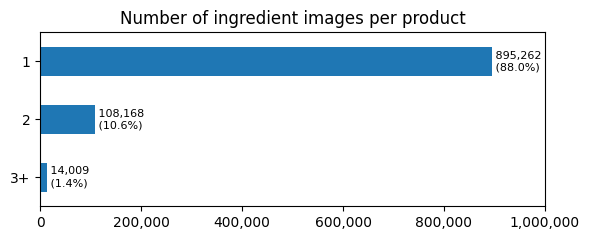

In [6]:
img_counts = df_images.images.str.split(',').map(len).map(lambda x: "3+" if x >= 3 else str(x))
display(img_counts.value_counts().sort_index().map("{:,}".format))

ax = img_counts.value_counts().sort_index(ascending=False).plot.barh(title='Number of ingredient images per product', figsize=(6,2.5))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax.set_ylabel(None)
ax.set_xlim(0, 1e6)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            f' {width:,}\n ({width / len(df_images) * 100:.1f}%)', va='center', ha='left', fontsize=8)
    
plt.tight_layout()
plt.show()

Number of ingredient images: 1,163,301


images
ingredients_fr    579,762
ingredients_en    212,462
<OTHER 111>       139,042
ingredients_de    107,551
ingredients_es     78,250
ingredients        46,234
Name: count, dtype: object

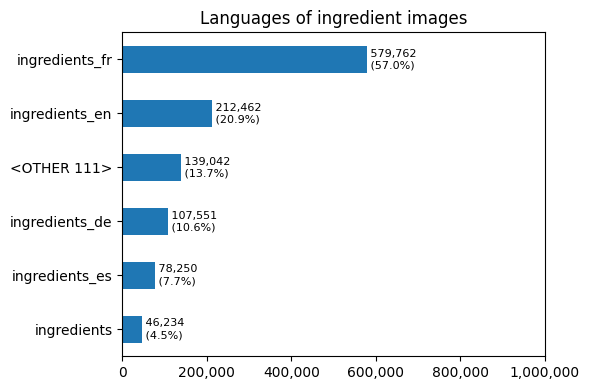

In [7]:
max_count = 5
img_lang = df_images.images.str.split(',').explode()
print(f"Number of ingredient images: {len(img_lang):,}")
top_langs = img_lang.value_counts().head(max_count).index
other_count= len(img_lang.value_counts())-max_count
lang_values = img_lang.map(lambda x: x if x in top_langs else f"<OTHER {other_count}>").value_counts()
display(lang_values.map("{:,}".format))

ax = lang_values.plot.barh(title='Languages of ingredient images', figsize=(6,4))
ax.invert_yaxis()

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax.set_ylabel(None)
ax.set_xlim(0, 1e6)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            f' {width:,}\n ({width / len(df_images) * 100:.1f}%)', va='center', ha='left', fontsize=8)
    
plt.tight_layout()
plt.show()

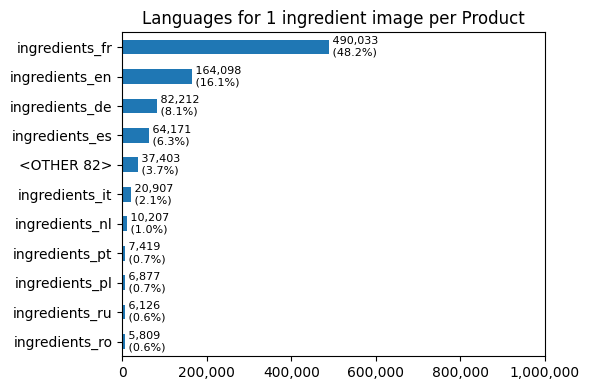

In [8]:
img_lang1 = df_images.images[img_counts == '1']
top_langs1 = img_lang1.value_counts().head(10).index
other_count= len(img_lang1.value_counts())-10

ax = img_lang1.map(lambda x: x if x in top_langs1 else f"<OTHER {other_count}>").value_counts().plot.barh(title='Languages for 1 ingredient image per Product', figsize=(6,4))
ax.invert_yaxis()

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax.set_ylabel(None)
ax.set_xlim(0, 1e6)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            f' {width:,}\n ({width / len(df_images) * 100:.1f}%)', va='center', ha='left', fontsize=8)
    
plt.tight_layout()
plt.show()

In [9]:
import itertools

img_lang2 = df_images.images.str.split(',')[lambda x: x.map(len) >= 2]
langs = img_lang2.explode().value_counts().index
short_langs = langs.str.replace('ingredients', '').str.replace('_', '')

co_occurrence = pd.DataFrame(0, index=langs, columns=langs)
for lang_list in img_lang2:
    for lang1, lang2 in itertools.combinations(lang_list, 2):
        co_occurrence.loc[lang1, lang2] += 1
        co_occurrence.loc[lang2, lang1] += 1

# (Optional) Count individual language occurrences on the diagonal
for lang_list in img_lang2:
    for lang in lang_list:
        co_occurrence.loc[lang, lang] += 1


In [10]:
co_occurrence.columns = short_langs
co_occurrence.index = short_langs
# restrict to first 10 rows and columns
co_occurrence.iloc[:10, :10]

images,fr,en,,de,es,nl,it,pt,sv,pl
images,,,,,,,,,,
fr,89729,28787,36126,16011,6183,7195,5359,1514,853,832
en,28787,48364,5216,7403,4604,3037,2924,1168,1093,1403
,36126,5216,46199,3736,3244,583,629,431,104,176
de,16011,7403,3736,25339,1614,2391,2521,635,625,838
es,6183,4604,3244,1614,14079,990,1056,2277,360,286
nl,7195,3037,583,2391,990,8766,895,469,443,233
it,5359,2924,629,2521,1056,895,7964,432,265,223
pt,1514,1168,431,635,2277,469,432,3773,205,198
sv,853,1093,104,625,360,443,265,205,2797,117


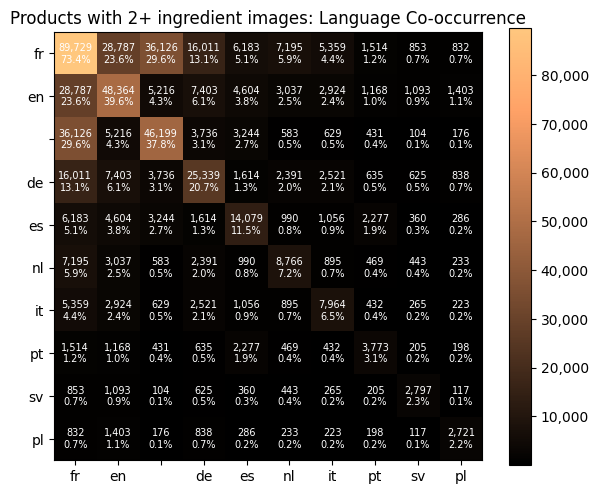

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(co_occurrence.iloc[:10, :10], cmap='copper', interpolation='nearest')

# Show language labels on axes
plt.xticks(range(10), short_langs[:10])
plt.yticks(range(10), short_langs[:10])

plt.colorbar(im, ax=ax, format=FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Print the count in each cell
for i in range(10):
    for j in range(10):
        # The co-occurrence value at row i, column j
        value = co_occurrence.iloc[i, j]
        ax.text(j, i, f"{value:,}\n{value / len(img_lang2) * 100:.1f}%",
                ha='center', va='center', color='white', fontsize=7)

plt.title("Products with 2+ ingredient images: Language Co-occurrence")
plt.tight_layout()
plt.show()

## Recognized Ingredients

In [12]:
df.known_ingredients_n.isna().value_counts()

known_ingredients_n
True     2631142
False    1040084
Name: count, dtype: int64

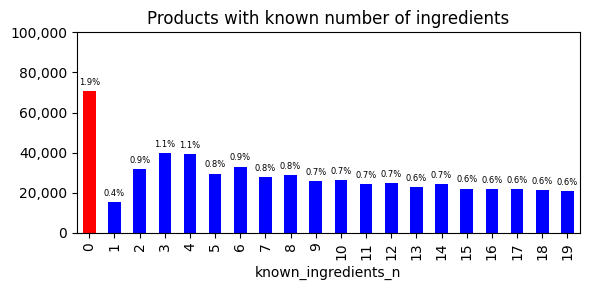

In [13]:
dfx = df.known_ingredients_n.value_counts().sort_index()
dfx.index = pd.CategoricalIndex(dfx.index, ordered=True)
colors = ['red' if idx == 0 else 'blue' for idx in dfx[:20].index]

ax = dfx[:20].plot.bar(figsize=(6,3), color=colors)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{int(y):,}'))

# Annotate each bar with its value
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height / len(df) * 100:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=6)

ax.set_ylim(0, 100000)
plt.title("Products with known number of ingredients")
plt.tight_layout();
plt.savefig("known_number_ingredients.png");

In [14]:
df.unknown_ingredients_n.isna().value_counts()

unknown_ingredients_n
True     2630411
False    1040815
Name: count, dtype: int64

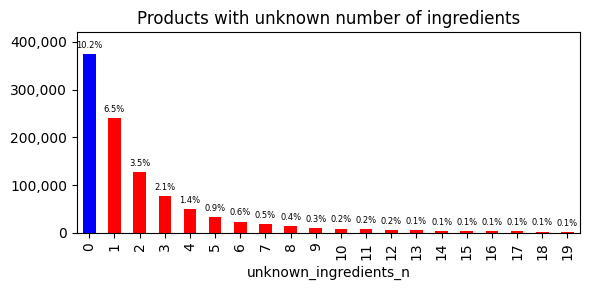

In [15]:
dfx = df.unknown_ingredients_n.value_counts().sort_index()
dfx.index = pd.CategoricalIndex(dfx.index, ordered=True)
colors = ['blue' if idx == 0 else 'red' for idx in dfx[:20].index]

ax = dfx[:20].plot.bar(figsize=(6,3), color=colors)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'{int(y):,}'))

# Annotate each bar with its value
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height / len(df) * 100:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=6)

ax.set_ylim(0, 420000)
plt.title("Products with unknown number of ingredients")
plt.tight_layout();
plt.savefig("unknown_number_ingredients.png");

<Axes: xlabel='unknown_ingredients_n'>

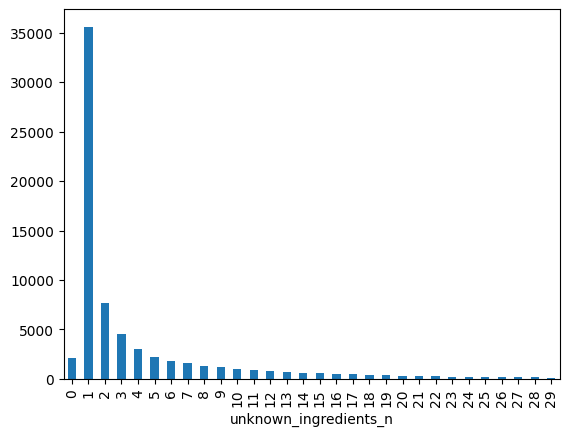

In [16]:
df[lambda x: x.known_ingredients_n == 0].unknown_ingredients_n.value_counts().sort_index()[:30].plot.bar()

In [17]:
df_ing_count = df[lambda x: x.known_ingredients_n.notna() & x.unknown_ingredients_n.notna()]
known = df_ing_count.known_ingredients_n.value_counts().sort_index()
unknown = df_ing_count.unknown_ingredients_n.value_counts().sort_index()
co_occurrence = pd.DataFrame(0, index=known.index, columns=unknown.index)

for _, row in df_ing_count.iterrows():
    co_occurrence.loc[row['known_ingredients_n'], row['unknown_ingredients_n']] += 1

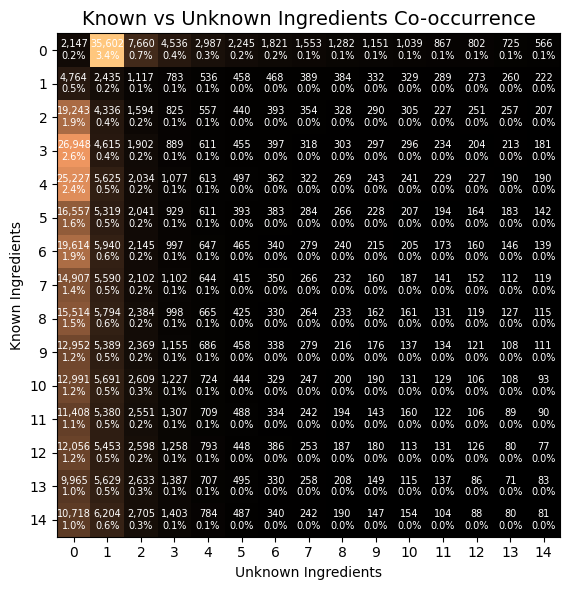

In [18]:
count = 15
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(co_occurrence.iloc[:count, :count], cmap='copper', interpolation='nearest')

# Show language labels on axes
plt.xticks(range(count), range(count))
plt.yticks(range(count), range(count))
plt.xlabel('Unknown Ingredients')
plt.ylabel('Known Ingredients')

#plt.colorbar(im, ax=ax, format=FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Print the count in each cell
for i in range(count):
    for j in range(count):
        # The co-occurrence value at row i, column j
        value = co_occurrence.iloc[i, j]
        ax.text(j, i, f"{value:,}\n{value / len(df_ing_count) * 100:.1f}%",
                ha='center', va='center', color='white', fontsize=7)

plt.title("Known vs Unknown Ingredients Co-occurrence", fontsize=14)
plt.tight_layout()
plt.show()